In [1]:
import pandas as pd
import numpy as np
from matplotlib.axes._axes import _log as axes_label
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE
from KMeans import *

In [2]:
dataset = pd.read_csv('image_new_test.txt', header = None, delim_whitespace = True)
dataset = dataset.to_numpy()
noOfRows = dataset.shape[0]
dataset_test = np.asarray([dataset[i][0].split(',') for i in range(noOfRows)])
print(dataset_test.shape)

(10000, 784)


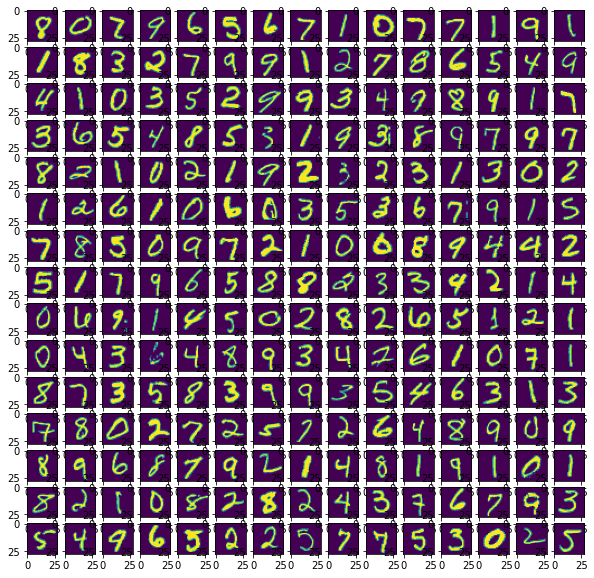

In [3]:
digits = dataset_test.reshape(dataset_test.shape[0], 28, 28)
figure, axes = plt.subplots(15, 15, figsize = (10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.uint8(digits[i]))

In [4]:
transform = Normalizer().fit(dataset_test)  
dataset_test = transform.transform(dataset_test)
print(dataset_test[0][0:10])

/Users/aniket/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/aniket/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
pca = PCA(n_components = 50)
dimension_reduced_test = pca.fit_transform(dataset_test.astype(float)/255)
print(dimension_reduced_test[0:5][0:5])

[[-4.17509850e-04 -8.14755966e-04 -5.19756051e-04 -1.13890064e-04
   6.92000509e-04  2.53868575e-04  5.32942137e-04 -1.06781264e-03
  -5.25194902e-04  5.02953090e-04 -2.52959108e-04 -2.78692318e-04
  -3.16176330e-05  1.41220018e-04 -5.30839536e-04 -5.26659501e-04
   3.01941413e-04 -1.29112481e-04 -5.50910264e-05 -2.18363618e-04
  -7.42453289e-05 -2.44399653e-04 -3.18374677e-04 -8.04884194e-05
  -8.01705207e-05  1.39694970e-04 -1.54828979e-04 -2.86666316e-04
   4.48333589e-04 -1.74355013e-04  3.78463703e-04  2.29346643e-04
   3.76053522e-05 -6.89028479e-05  8.49039777e-05 -7.38890473e-05
  -3.41003935e-05  1.82976988e-04 -2.04153060e-04  9.89180202e-06
   2.41410051e-04  2.91400667e-04 -1.16842089e-04 -1.24222414e-05
   4.10224033e-04 -2.82852821e-04  1.96919515e-04 -1.27908598e-04
  -3.64304155e-05 -5.74217486e-05]
 [-9.81451609e-04  5.95077289e-04 -1.00604757e-03 -1.04046619e-03
   5.99479897e-05  9.36025065e-04 -6.15900653e-04 -1.43032479e-04
   2.81172100e-04 -1.02301715e-03  1.5115

In [6]:
print(dataset_test.shape)
print(dimension_reduced_test.shape)

(10000, 784)
(10000, 50)


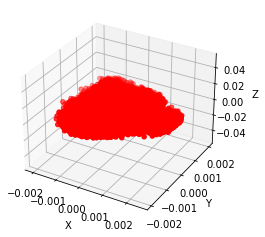

In [7]:
figure = plt.figure()
plot = figure.add_subplot(projection = '3d')
plot.scatter(dimension_reduced_test[:, 0], dimension_reduced_test[:, 1], c = 'red')
plot.set_xlabel('X')
plot.set_ylabel('Y')
plot.set_zlabel('Z')
plt.show()

In [8]:
tsne = TSNE(random_state = 0)
tsne_dataset_test = tsne.fit_transform(dimension_reduced_test)
print(tsne_dataset_test[0:10])

[[-20.56582    -8.644764 ]
 [ 52.71666    15.462181 ]
 [  6.494395  -60.79411  ]
 [-18.850868  -30.708708 ]
 [ 23.09241    78.98235  ]
 [-24.463034   53.019127 ]
 [  9.567269   63.716965 ]
 [ -0.9932073 -56.331387 ]
 [ 58.65526   -28.011059 ]
 [ 57.784878   39.818672 ]]


<Figure size 432x288 with 0 Axes>

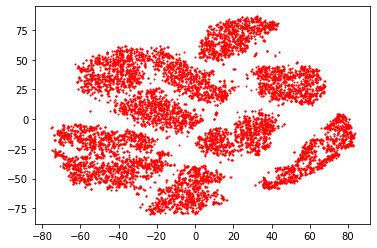

In [9]:
figure = plt.figure()
cmap = plt.cm.get_cmap('hsv', 10)
figure, axes = plt.subplots()
axes.scatter(tsne_dataset_test[:, 0], tsne_dataset_test[:, 1],  s = 1, c = 'red')

In [10]:
error = np.zeros((100, 10))
label = np.zeros((100, 10000))
centroid = np.zeros((100, 10, 2))
for i in range(100):
    KMeansDigit = KMeans(X = tsne_dataset_test, K = 10, F = 2)
    KMeansDigit.ArbitraryCentroid()
    error[i], label[i], centroid[i] = KMeansDigit.Main(100)

100%|██████████| 100/100 [00:00<00:00, 342.79it/s]


In [11]:
TotalError = error.sum(axis = 1)
print('TotalError: \n', TotalError)
OptimalKMeans = np.argmin(TotalError)
print('OptimalKMeans: \n', TotalError[OptimalKMeans])

TotalError: 
 [142446.52320058 142446.52320058 142445.50761404 142503.34891488
 142446.52320058 142502.094555   145325.12315383 147169.88998062
 142446.52320058 142450.08015232 142446.52320058 142503.34891488
 142450.08015232 142502.094555   142445.50761404 142449.06456578
 145320.04619466 142446.52320058 145326.32067623 145327.1672703
 145326.32067623 142503.34891488 142503.34891488 142503.34891488
 142450.08015232 142445.50761404 142446.52320058 145320.04619466
 142446.52320058 142501.1581472  142445.50761404 142445.50761404
 142501.1581472  142503.34891488 145902.064459   142501.1581472
 142446.52320058 142446.52320058 142450.08015232 145327.25581344
 145327.1672703  142503.34891488 142501.1581472  142446.52320058
 145445.6896859  145902.064459   142446.52320058 145446.47665277
 142501.1581472  145326.32067623 145447.05024604 148220.03221657
 142498.81958517 142446.52320058 142450.08015232 142445.50761404
 145327.1672703  142446.52320058 142450.08015232 145326.32067623
 142503.34891

In [12]:
predictions = label[OptimalKMeans].astype(int)

<Figure size 432x288 with 0 Axes>

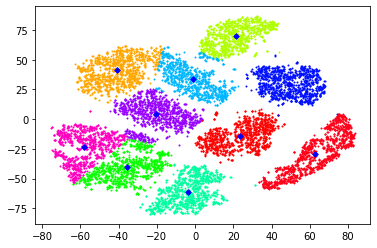

In [13]:
axes_label.setLevel('ERROR')
figure = plt.figure()
cmap = plt.cm.get_cmap('hsv', 10)
figure, axes = plt.subplots()
for i in range(10):
        axes.scatter(tsne_dataset_test[label[OptimalKMeans] == i][:, 0], tsne_dataset_test[label[OptimalKMeans] == i][:, 1], s = 1, c = cmap(i))
        axes.scatter(centroid[OptimalKMeans][i, 0], centroid[OptimalKMeans][i, 1], marker = 'D', s = 15, c = 'blue')

In [14]:
np.savetxt("format_digit.txt", predictions, fmt = '%s')